![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import numpy as np
import pandas as pd


df_original = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df_original.head().sort_values(by='price',ascending=True)

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000


In [4]:
import pandas as pd

# Misol DataFrame
data = {
    'size': [300, 600, 400, 800, 200],
    'sizemd': [0, 0, 0, 0, 0]
}
df = pd.DataFrame(data)

# size ustunidagi elementlar 500 dan katta bo'lsa, sizemd ustuniga almashtirish
df.loc[df['size'] > 500, 'size'] = df['sizemd']

print(df)

   size  sizemd
0   300       0
1     0       0
2   400       0
3     0       0
4   200       0


In [7]:
df_original['price']=pd.to_numeric(df_original['price'],errors='coerce')
df_original.groupby(['district','size','rooms'])['price'].transform(lambda x: x.fillna(x.mean()))

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: price, Length: 7565, dtype: float64

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [8]:
df_original.describe()

,rooms,level,max_levels,price
count,7565.000000,7565.000000,7565.000000,7.466000e+03
mean,2.625644,3.699273,6.038202,7.133421e+04
std,1.085201,2.237275,2.613271,6.405237e+05
min,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,5.000000,9.000000,6.700000e+04
max,10.000000,19.000000,25.000000,5.200000e+07


In [9]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   object 
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 413.8+ KB


In [10]:

df_original.isna().sum()

location       0
district       0
rooms          0
size           0
level          0
max_levels     0
price         99
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
df,df_test=train_test_split(df_original,test_size=0.25,random_state=45)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split_stabil=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=12)
for train_index, test_index in split_stabil.split(df, df['district']):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]

In [13]:
df_train

,location,district,rooms,size,level,max_levels,price
3649,"город Ташкент, Шайхантахурский район, Урда",Шайхантахурский,3,70,6,7,58000.0
6458,"город Ташкент, Чиланзарский район, Чиланзар-7",Чиланзарский,3,58,1,4,39000.0
2713,"город Ташкент, Учтепинский район, Чиланзар 24-...",Учтепинский,4,92,1,4,57000.0
1377,"город Ташкент, Юнусабадский район, ц-5 Киёт (Ц...",Юнусабадский,3,67,4,4,70000.0
7488,"город Ташкент, Юнусабадский район, Юнусабад 6кв",Юнусабадский,1,42,4,4,22000.0
...,...,...,...,...,...,...,...
2155,"город Ташкент, Яккасарайский район, Кушбеги",Яккасарайский,1,44,2,9,27000.0
3828,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,67,3,4,42200.0
5015,"город Ташкент, Яшнободский район, Тузель 3-й к...",Яшнободский,4,110,1,9,55000.0
5379,"город Ташкент, Чиланзарский район, Катта козир...",Чиланзарский,3,68,4,5,43500.0


In [14]:
df['price']=pd.to_numeric(df['price'],errors='coerce')

In [15]:
df['price'].sort_values(ascending=False)

5903    52000000.0
6952    15504000.0
7081     6630000.0
7296     5568000.0
7466     1470000.0
           ...    
873            NaN
2673           NaN
6738           NaN
892            NaN
6859           NaN
Name: price, Length: 5673, dtype: float64

In [16]:
df[df['price'].isna()]

,location,district,rooms,size,level,max_levels,price
988,"город Ташкент, Яккасарайский район, Дамарик",Яккасарайский,5,196,3,6,NaN
6608,"город Ташкент, Шайхантахурский район, Ифтихор",Шайхантахурский,2,69,2,9,NaN
1804,"город Ташкент, Мирзо-Улугбекский район, 1-й пр...",Мирзо-Улугбекский,3,93,2,4,NaN
3455,"город Ташкент, Сергелийский район, 1-й проезд ...",Сергелийский,3,60,2,4,NaN
4453,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,1,42.60,2,8,NaN
...,...,...,...,...,...,...,...
873,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,4,78,4,4,NaN
2673,"город Ташкент, Юнусабадский район, 1-й проезд ...",Юнусабадский,2,78,7,11,NaN
6738,"город Ташкент, Юнусабадский район, 18",Юнусабадский,3,91,4,7,NaN
892,"город Ташкент, Яшнободский район, жилой компле...",Яшнободский,3,74,8,9,NaN


In [17]:
df['streat']=df['location'].str.split(',').map(lambda x:x[-1])

In [18]:
df['streat'].describe()

count          5673
unique         1288
top        Чиланзар
freq             93
Name: streat, dtype: object

In [19]:
df['size']=pd.to_numeric(df['size'],errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5673 entries, 7185 to 7115
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    5673 non-null   object 
 1   district    5673 non-null   object 
 2   rooms       5673 non-null   int64  
 3   size        5672 non-null   float64
 4   level       5673 non-null   int64  
 5   max_levels  5673 non-null   int64  
 6   price       5594 non-null   float64
 7   streat      5673 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 398.9+ KB


In [21]:
df.select_dtypes(np.number).corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.026268,0.133940,0.179876,0.053097
size,0.026268,1.000000,-0.013514,-0.014293,0.000671
level,0.133940,-0.013514,1.000000,0.586069,-0.006667
max_levels,0.179876,-0.014293,0.586069,1.000000,0.007367
price,0.053097,0.000671,-0.006667,0.007367,1.000000


In [22]:
df['price']=df['price'].fillna(df['price'].median())
df.isna().sum()

location      0
district      0
rooms         0
size          1
level         0
max_levels    0
price         0
streat        0
dtype: int64

In [23]:
df['rooms'].isna().sum()

np.int64(0)

In [24]:
df['level'].unique()

array([ 4,  9,  2,  5,  1,  3, 10, 12,  8,  7,  6, 19, 13, 16, 11, 14, 18,
       15])

In [25]:

df['price'].describe()

count    5.673000e+03
mean     7.317830e+04
std      7.301812e+05
min      1.000000e+03
25%      3.500000e+04
50%      4.650000e+04
75%      6.600000e+04
max      5.200000e+07
Name: price, dtype: float64

In [26]:
a=df['price'].sort_values(ascending=False)[:6].index


In [27]:
df.sort_values(by='price',ascending=False)

,location,district,rooms,size,level,max_levels,price,streat
5903,"город Ташкент, Учтепинский район, Chtepa Fozil...",Учтепинский,4,72.0,2,5,52000000.0,Chtepa Foziltepa 22dom
6952,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,3,114.0,5,7,15504000.0,Алишера Навои
7081,"город Ташкент, Чиланзарский район, Тирсакобод",Чиланзарский,2,85.0,2,3,6630000.0,Тирсакобод
7296,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,96.0,2,5,5568000.0,Садыка Азимова (Жуковского)
7466,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,2,42.0,1,3,1470000.0,1-й проезд Катта Чиланзар
...,...,...,...,...,...,...,...,...
7276,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,16.0,3,4,7300.0,Городок Авиастроителей 3-й квартал
7333,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,30.0,2,4,2400.0,Буюк Ипак Йули
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000.0,Хирмонтепа (Никитина)
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0,Нукус


In [28]:
df.loc[list(a),'price']=df.loc[list(a),'price']/100

In [29]:
df.sort_values(by='price',ascending=False)

,location,district,rooms,size,level,max_levels,price,streat
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000.0,Фидокор (Чехова)
7478,"город Ташкент, Чиланзарский район, Катта козир...",Чиланзарский,1,28.0,3,4,644000.0,Катта козиробод
5903,"город Ташкент, Учтепинский район, Chtepa Fozil...",Учтепинский,4,72.0,2,5,520000.0,Chtepa Foziltepa 22dom
3163,"город Ташкент, Мирзо-Улугбекский район, Кори Н...",Мирзо-Улугбекский,4,200.0,2,7,500000.0,Кори Ниёзий
1557,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.0,7,7,425600.0,Минор
...,...,...,...,...,...,...,...,...
7276,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,16.0,3,4,7300.0,Городок Авиастроителей 3-й квартал
7333,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,30.0,2,4,2400.0,Буюк Ипак Йули
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000.0,Хирмонтепа (Никитина)
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0,Нукус


<Figure size 1200x400 with 0 Axes>

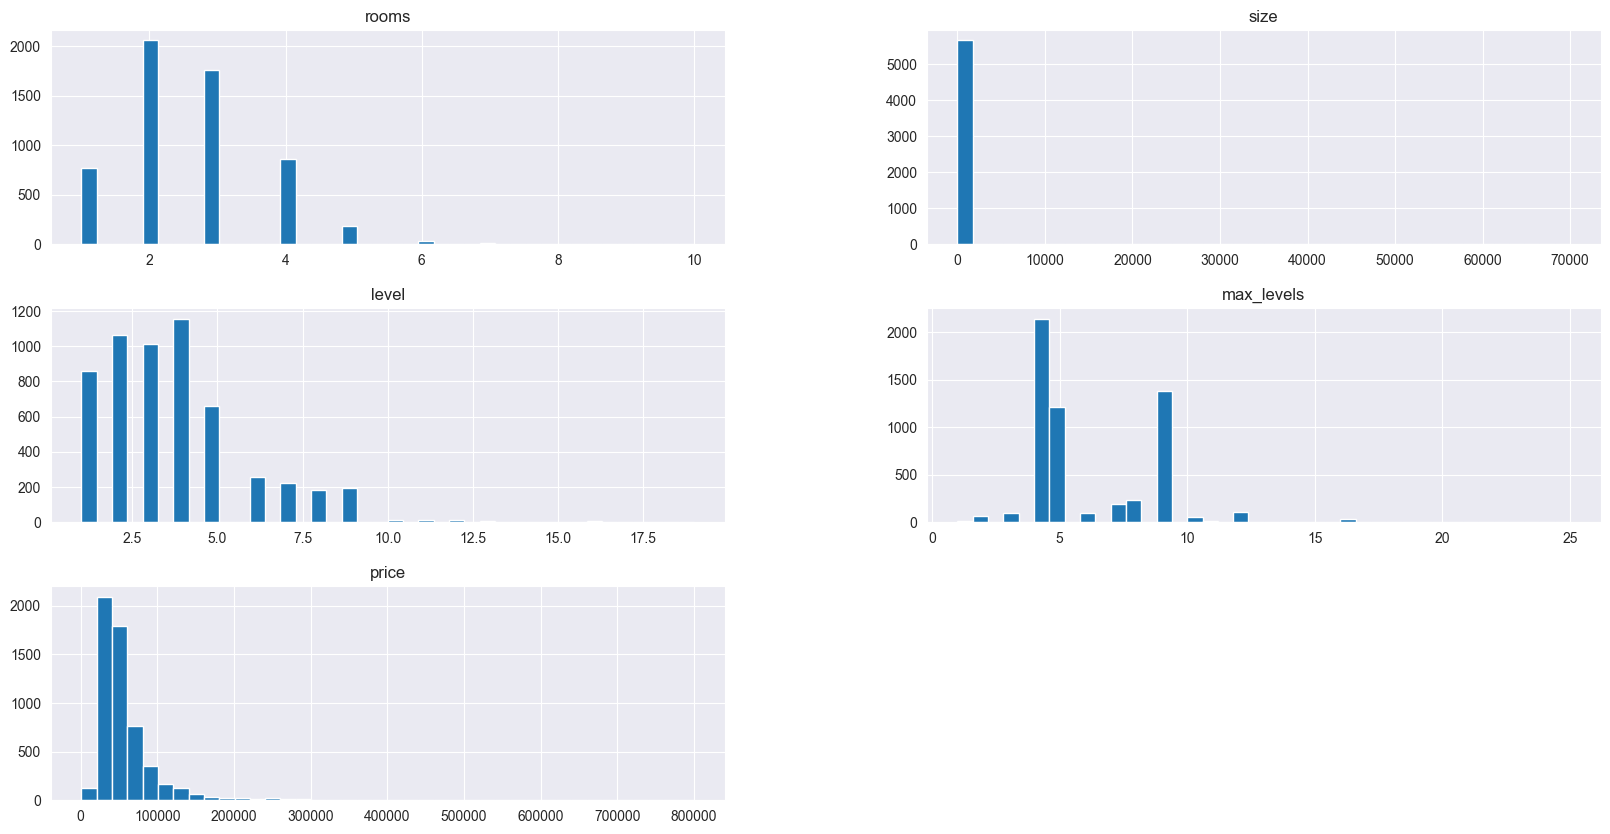

In [30]:

plt.figure(figsize=(12,4))
df.hist(bins=40,figsize=(20,10))
plt.show()

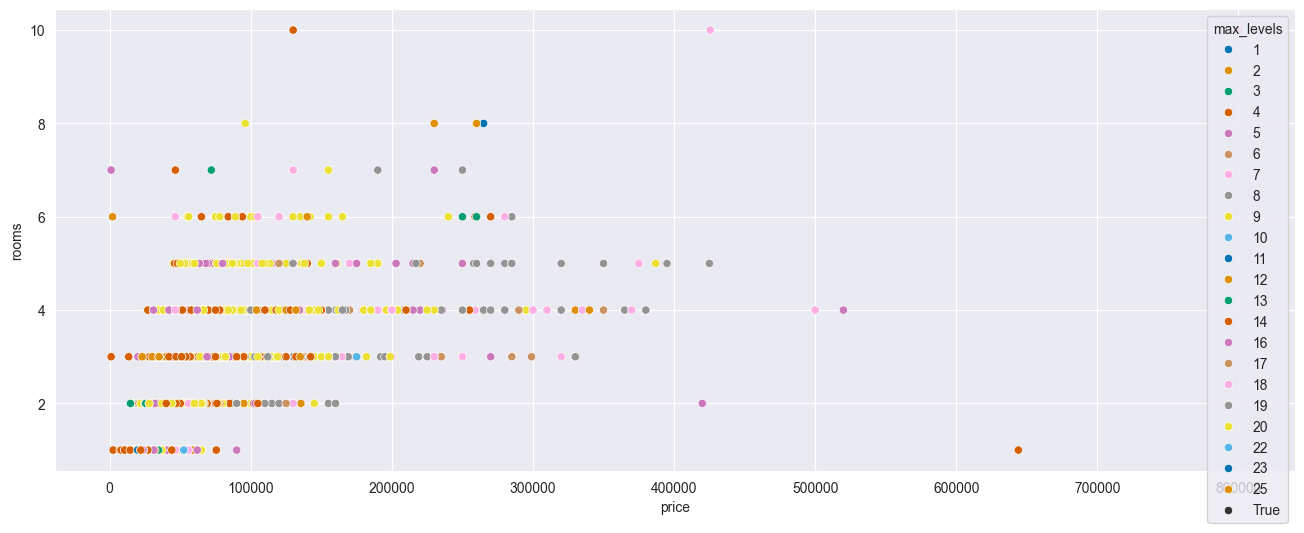

In [31]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.figure(figsize=(16,6))
sns.scatterplot(data=df,y='rooms',x='price',style=True,hue='max_levels',color='y',palette='colorblind')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

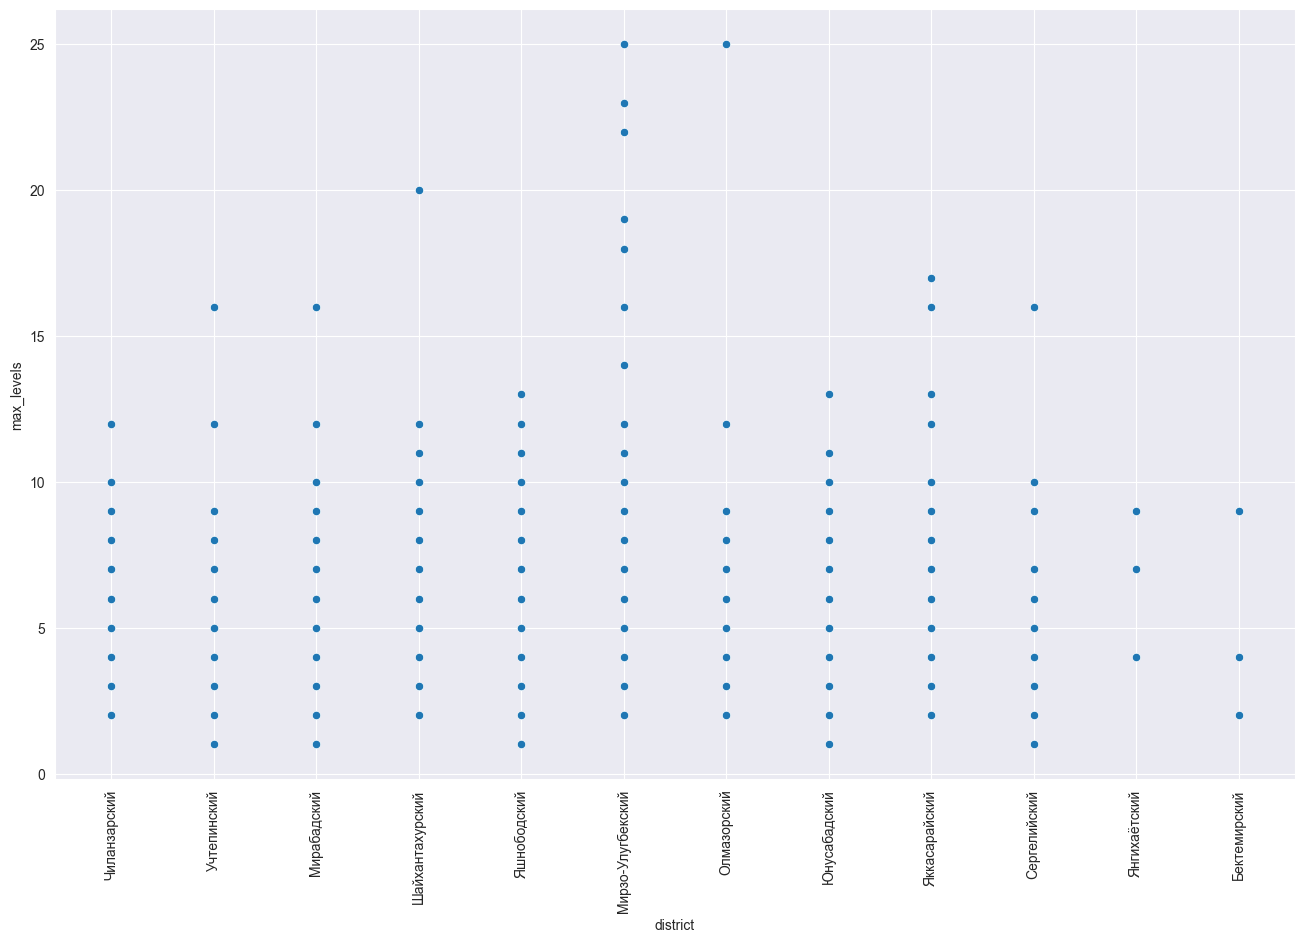

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df,x='district',y='max_levels')
plt.xticks(rotation=90)
plt.show

In [33]:
df_hmap=pd.crosstab(df['district'],df['level'],values=df['price'],margins=True,aggfunc='sum',)
df_hmap.fillna(0,inplace=True)

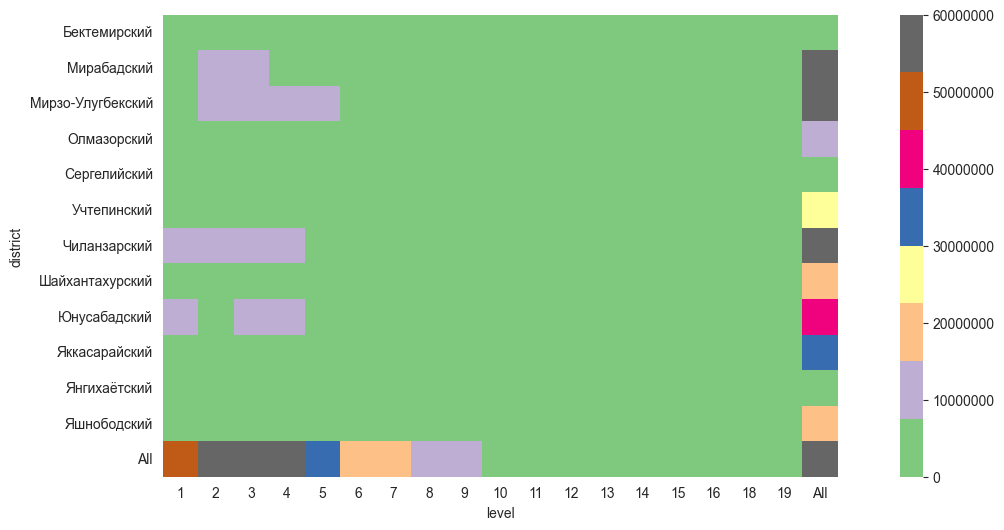

In [34]:
plt.figure(figsize=(16,6))
sns.heatmap(data=df_hmap, fmt='', cbar_kws={'format': '%.0f'},vmax=60000000,vmin=0,square=True,cmap='Accent')
plt.show()

In [35]:
df.sort_values(ascending=False,by='size')

,location,district,rooms,size,level,max_levels,price,streat
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.00,2,4,76000.00,Киёт
4615,"город Ташкент, Олмазорский район, Метро Тынчлик",Олмазорский,4,69000.00,3,4,69000.00,Метро Тынчлик
5456,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,3,67000.00,2,5,67000.00,Карасу 2-й квартал
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.00,3,4,44000.00,Карасу 6-й квартал
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.00,2,5,24500.00,Ахмад Югнакий
...,...,...,...,...,...,...,...,...
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.80,2,2,90000.00,1-й проезд Хушнуд
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.00,1,1,50000.00,Nurli zamin kochasi
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.00,6,9,45000.00,Yangi hayot dostlik2
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.00,2,5,35000.00,Чиланзар 25-й квартал


In [36]:
idx=df['size'].sort_values(ascending=False)[:5].index
df.loc[idx,'size']=df['size'].sort_values(ascending=False)[:5]/1000

In [37]:
df.sort_values(by='size',ascending=False)

,location,district,rooms,size,level,max_levels,price,streat
7043,"город Ташкент, Олмазорский район, Олмазорский ...",Олмазорский,4,7407.00,4,4,44000.00,Олмазорский райо
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.00,2,4,46500.00,Массив Куйлюк -1
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.00,5,5,25000.00,Учтепинский район
7421,"город Ташкент, Юнусабадский район, Хасанбой",Юнусабадский,8,2100.00,1,1,265000.00,Хасанбой
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.00,3,7,800000.00,Фидокор (Чехова)
...,...,...,...,...,...,...,...,...
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.80,2,2,90000.00,1-й проезд Хушнуд
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.00,1,1,50000.00,Nurli zamin kochasi
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.00,2,5,35000.00,Чиланзар 25-й квартал
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.00,6,9,45000.00,Yangi hayot dostlik2


In [38]:
idx=df['size'].sort_values(ascending=False)[:3].index
df.loc[idx,'size']=df['size'].sort_values(ascending=False)[:3]/100

In [39]:
df.sort_values(by='size',ascending=False)

,location,district,rooms,size,level,max_levels,price,streat
7421,"город Ташкент, Юнусабадский район, Хасанбой",Юнусабадский,8,2100.00,1,1,265000.00,Хасанбой
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.00,3,7,800000.00,Фидокор (Чехова)
5874,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.00,7,7,425600.00,Минор
1557,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.00,7,7,425600.00,Минор
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.00,1,2,2000.00,Хирмонтепа (Никитина)
...,...,...,...,...,...,...,...,...
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.80,2,2,90000.00,1-й проезд Хушнуд
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.00,1,1,50000.00,Nurli zamin kochasi
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.00,6,9,45000.00,Yangi hayot dostlik2
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.00,2,5,35000.00,Чиланзар 25-й квартал


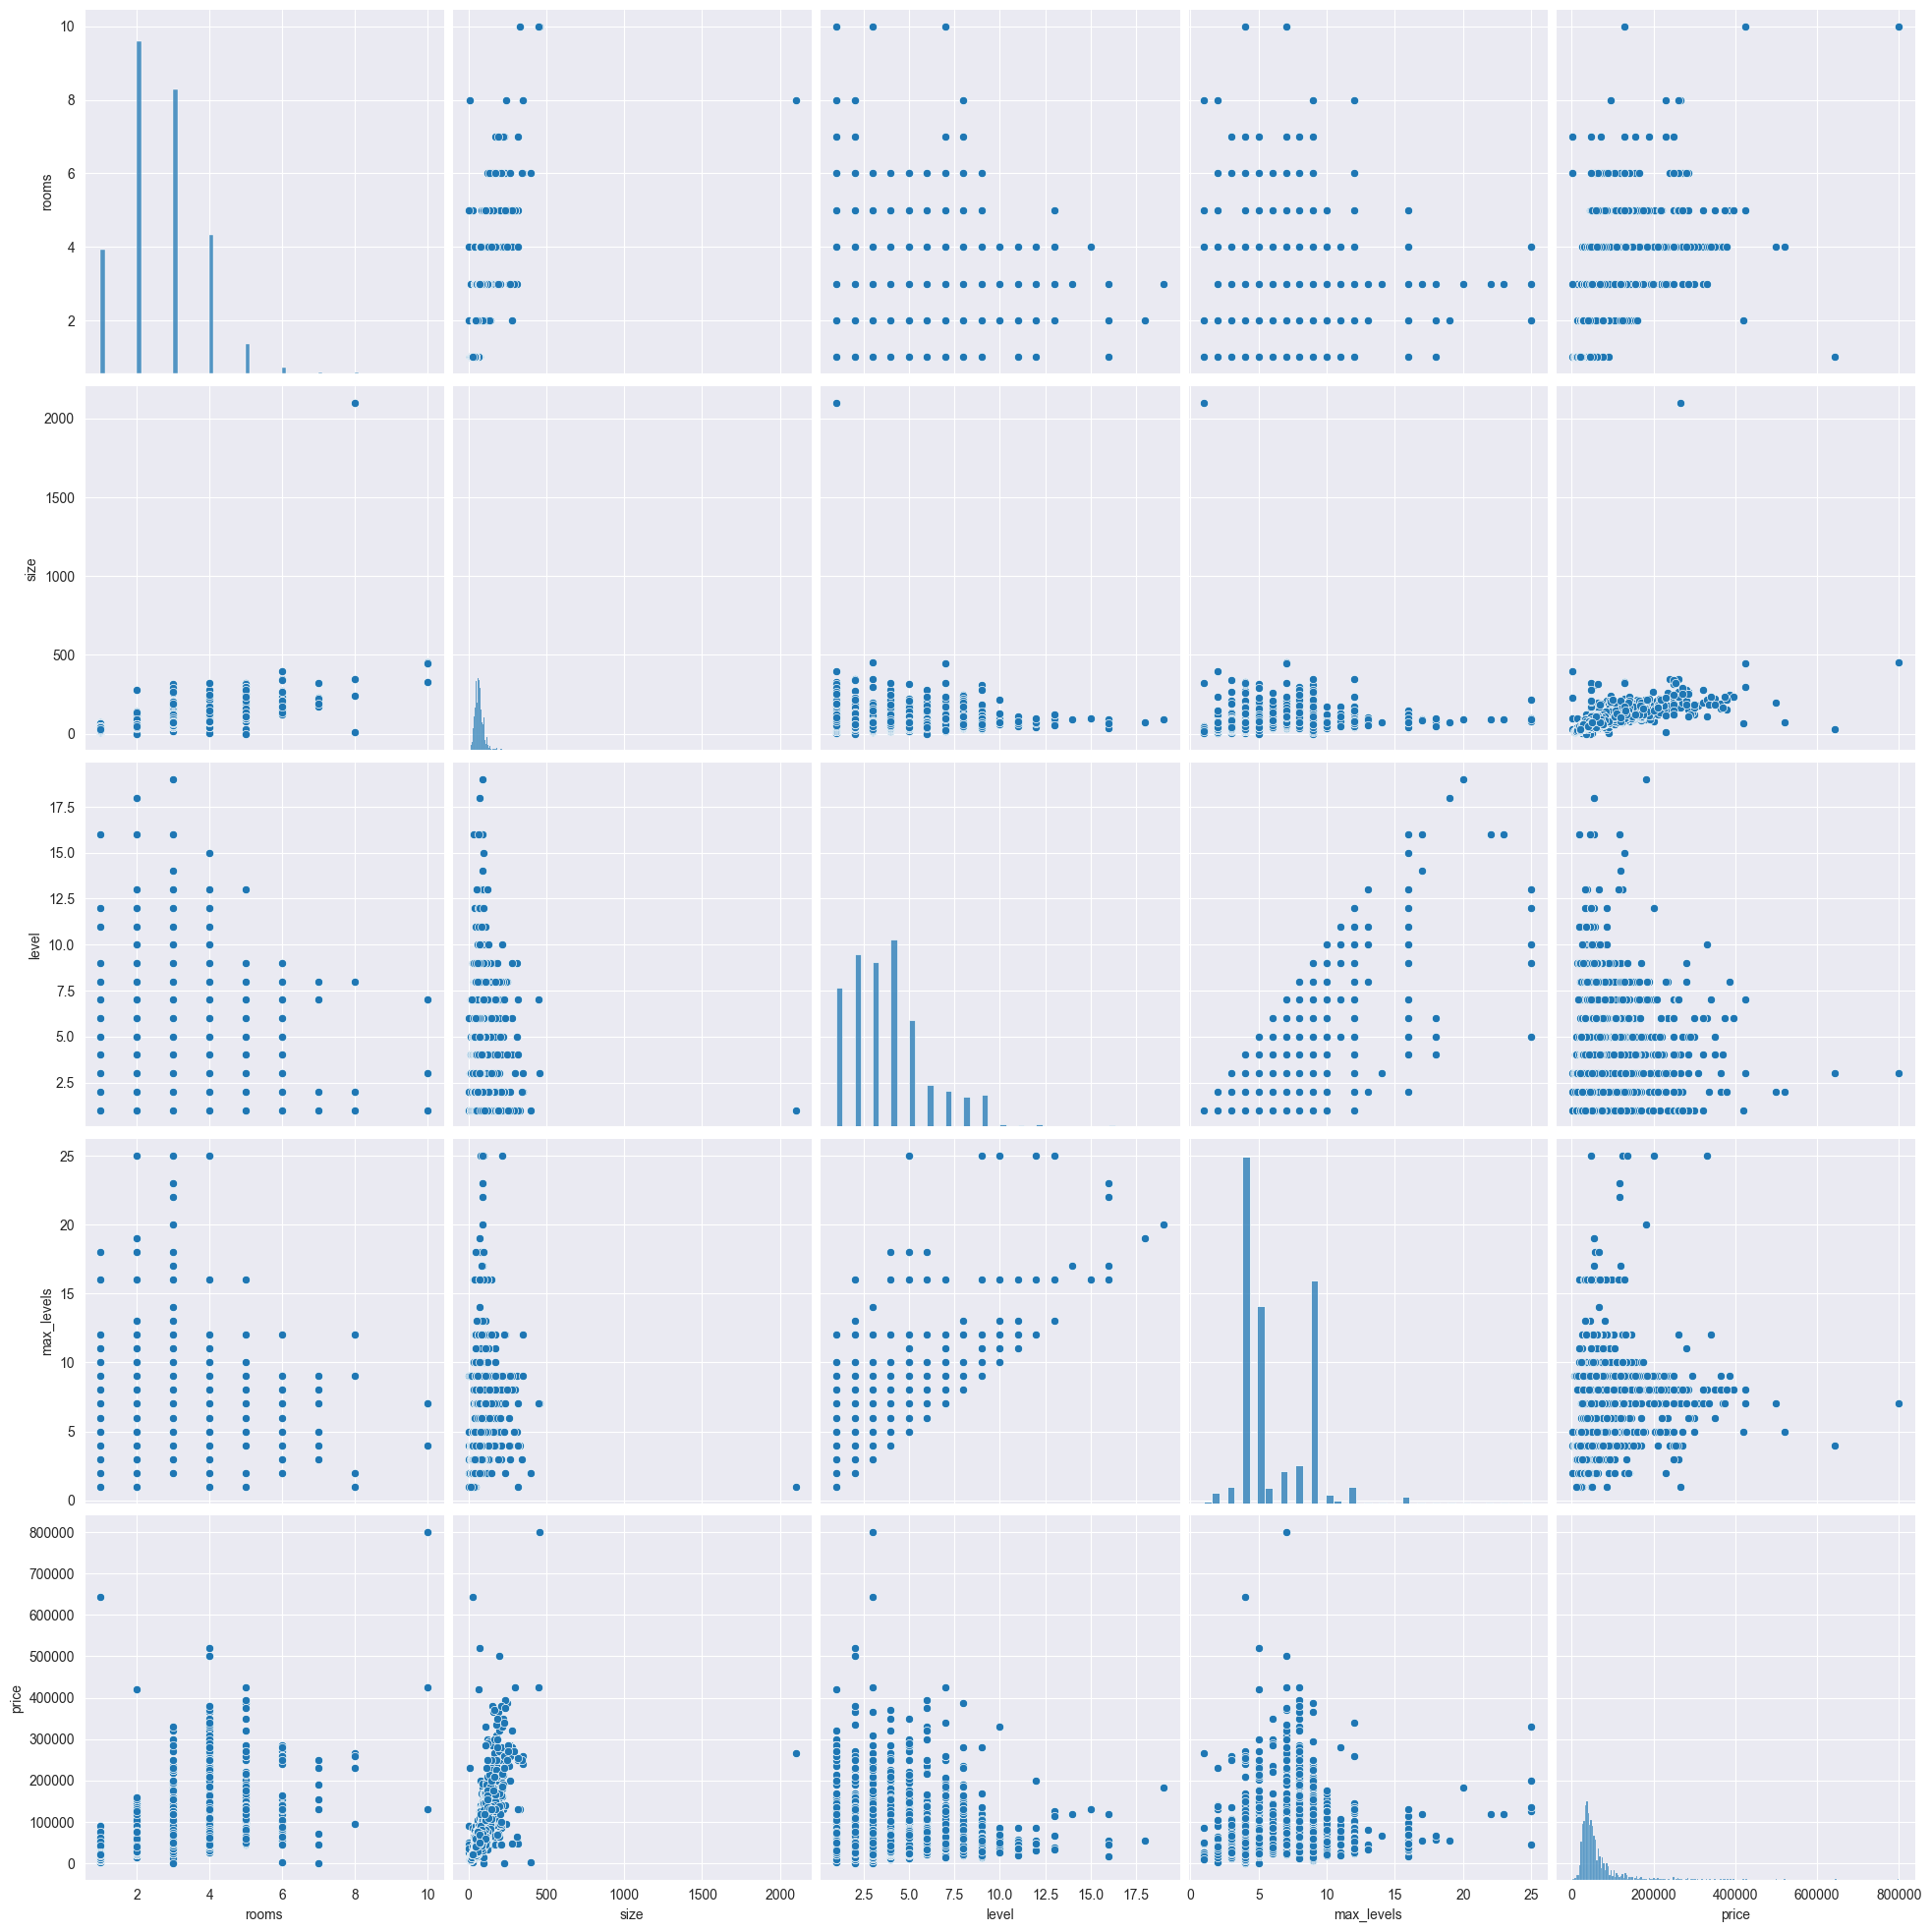

In [40]:
sns.pairplot(data=df.select_dtypes(np.number),height=4)
plt.show()

In [41]:
df

,location,district,rooms,size,level,max_levels,price,streat
7185,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,98.00,4,4,52000.00,Чиланзар квартал 20Д
6219,"город Ташкент, Учтепинский район, Чиланзар 30-...",Учтепинский,1,58.00,9,12,26000.00,Чиланзар 30-й квартал
3309,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,3,80.00,2,4,78000.00,Тараса Шевченко
6863,"город Ташкент, Шайхантахурский район, Бельтепа",Шайхантахурский,3,77.00,5,5,45000.00,Бельтепа
4624,"город Ташкент, Яшнободский район, Тузель 1-й к...",Яшнободский,1,36.00,1,9,22000.00,Тузель 1-й квартал
...,...,...,...,...,...,...,...,...
3616,"город Ташкент, Мирзо-Улугбекский район, Паркент",Мирзо-Улугбекский,2,62.00,2,9,44000.00,Паркент
6012,"город Ташкент, Яккасарайский район, Башлык",Яккасарайский,5,112.00,8,9,60000.00,Башлык
5763,"город Ташкент, Мирзо-Улугбекский район, Дом быта",Мирзо-Улугбекский,1,30.00,3,4,22000.00,Дом быта
6558,"город Ташкент, Чиланзарский район, Чиланзар 7-...",Чиланзарский,2,46.00,3,4,40000.00,Чиланзар 7-й квартал


In [42]:
df.sort_values(by=['max_levels','level'],ascending=False)

,location,district,rooms,size,level,max_levels,price,streat
5675,"город Ташкент, Мирзо-Улугбекский район, Аккурган",Мирзо-Улугбекский,3,100.00,13,25,125000.00,Аккурган
1783,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,3,80.00,12,25,200000.00,жилой комплекс Akay City
4550,"город Ташкент, Олмазорский район, Фараби",Олмазорский,4,215.00,10,25,330000.00,Фараби
4548,"город Ташкент, Мирзо-Улугбекский район, Бешога...",Мирзо-Улугбекский,2,90.00,9,25,135500.00,Бешогайнилар
6819,"город Ташкент, Мирзо-Улугбекский район, Кори Н...",Мирзо-Улугбекский,4,95.00,5,25,46500.00,Кори Ниёзий
...,...,...,...,...,...,...,...,...
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.00,1,1,50000.00,Nurli zamin kochasi
7421,"город Ташкент, Юнусабадский район, Хасанбой",Юнусабадский,8,2100.00,1,1,265000.00,Хасанбой
545,"город Ташкент, Мирабадский район, СЕВЕРНЫЙ ВОКЗАЛ",Мирабадский,2,40.00,1,1,22500.00,СЕВЕРНЫЙ ВОКЗАЛ
4114,"город Ташкент, Сергелийский район, Сергели-IV",Сергелийский,1,32.00,1,1,16500.00,Сергели-IV


In [43]:
df.rooms.sort_values(ascending=False)

1695    10
1696    10
5874    10
1557    10
1675     8
        ..
6170     1
5091     1
4656     1
6508     1
6502     1
Name: rooms, Length: 5673, dtype: int64

In [44]:
df['district_id']=pd.factorize(df['district'])[0]

In [45]:
df.select_dtypes(np.number).corrwith(df['price'])

rooms         0.55
size          0.65
level         0.05
max_levels    0.22
price         1.00
district_id   0.08
dtype: float64

In [46]:
df['streat_id']=pd.factorize(df['streat'])[0]

In [47]:
df.select_dtypes(np.number).corrwith(df['price'])

rooms         0.55
size          0.65
level         0.05
max_levels    0.22
price         1.00
district_id   0.08
streat_id     0.03
dtype: float64

In [62]:
df['price_md']=df.groupby(['rooms','level','max_levels','district'])['price'].transform(lambda x: x.median() if x.any() > 1000000 else x)

In [63]:
df.loc[a,['price','price_md']].sort_values(by='price',ascending=False)

,price,price_md
5903,520000.00,520000.00
6952,155040.00,155040.00
7081,66300.00,66300.00
7296,55680.00,55680.00
7466,14700.00,14700.00
6133,13440.00,13440.00


In [64]:
a

Index([5903, 6952, 7081, 7296, 7466, 6133], dtype='int64')